<h1 style="color:blue;">I have already write the goal of this project in the "Readme" section please go through it before getting into the code</h1>

### Importing libraries and dataset
<b>pandas</b> for doing managing dataset<br>
<b>numpy</b> for scientific calculations<br>
<b>matplotlib</b> for plotting graphs<br>
<b>seaborn</b> for user friendly graphs

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset is in csv format and for loading csv files we have a function <b>read_csv</b> in pandas library

In [307]:
cars=pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Change the <b>CarName</b> column & data to <b>CompanyName</b> column and data to have a broader view and also there is only one or two types of car per type approx. So it's much better to categorize this column as <b>CompanyName</b>

In [308]:
cars["CompanyName"]=cars.CarName.apply(lambda x : x.split(" ")[0])
cars.drop(["CarName"],axis=1,inplace=True)

Diffrentiating categorical and numerical values

In [309]:
categorical_columns=["symboling","CompanyName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation",
                     "enginetype","cylindernumber","fuelsystem"]
numerical_columns=["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke",
       "compressionratio","horsepower","peakrpm","citympg","highwaympg"]

In [310]:
for i in categorical_columns:
    print(cars[i].unique())
    print("============================")

[ 3  1  2  0 -1 -2]
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


On closely looking at the <b>CompanyName</b> Column we find that there are some similar names which hold same means but are considered different because of some spelling error or case senstivity

In [311]:
cars.CompanyName=cars.CompanyName.str.lower()

In [312]:
cars.CompanyName.replace("maxda","mazda",inplace=True)
cars.CompanyName.replace("vokswagen","volkswagen",inplace=True)
cars.CompanyName.replace("vw","volkswagen",inplace=True)
cars.CompanyName.replace("porcshce","porsche",inplace=True)
cars.CompanyName.replace("toyouta","toyota",inplace=True)

<b>shape</b> gives rows X columns <br><b>info</b> gives the datatype of each column <br><b>describe</b> gives the stactical information of numerical columns

In [313]:
cars.shape

(205, 26)

In [314]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [315]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<b>duplicated</b> checks for duplicate rows in the dataset

In [316]:
cars.duplicated().sum()

0

Let's take a look at histogram of <b>price</b>

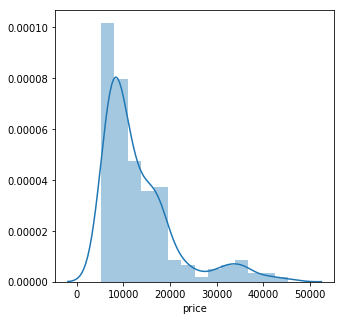

In [317]:
plt.figure(figsize=(5,5))
plt.title=("Price Histogram")
sns.distplot(cars.price)
plt.show()

It is clearly visible that our graph is positively skewed. So let's decrease it's skewness

In [318]:
cars["skew_price"] = np.log(cars["price"] + 1)
cars["skew_price"].describe()
cars.drop(["price"],axis=1,inplace=True)

Now again take a look at histogram

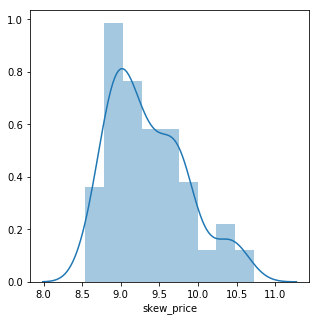

In [319]:
plt.figure(figsize=(5,5))
plt.title=("Price Histogram")
sns.distplot(cars["skew_price"])
plt.show()

Now it seems better

What can be better other than grpahs to get familiar with your data<br>
So first of all take a look at categorical data columns by:-<br>
<ol>
    <li>Scatter plot of each data item of each categorical column against price.
    <li>Value count of each type of item of each categorical column aginst price.
    <li>Get the idea of range of each type of item of each categorical column against price.
</ol>

In [320]:
def categorical_visualization(x):
    print(x)
        
    plt.figure(figsize=(20,5))
    plt.scatter(cars[x],cars["skew_price"])
    plt.show()
    
    plt.figure(figsize=(5,5))
    cars[x].value_counts().plot("bar").set(xlabel=x)
    plt.show()
    
    plt.figure(figsize=(20,5))
    sns.boxplot(x=cars[x],y=cars["skew_price"])
    plt.show()

symboling


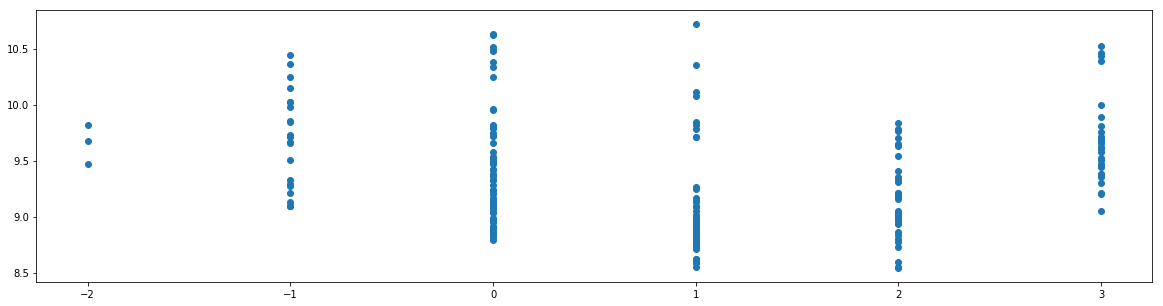

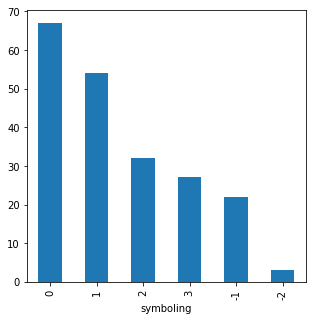

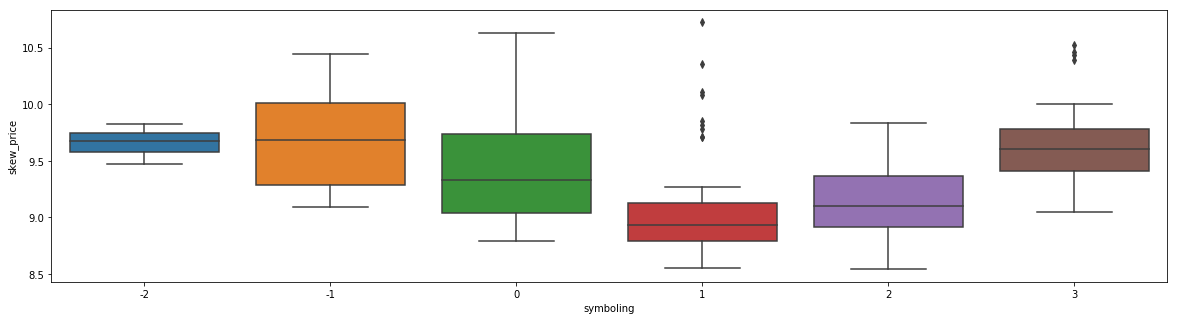

CompanyName


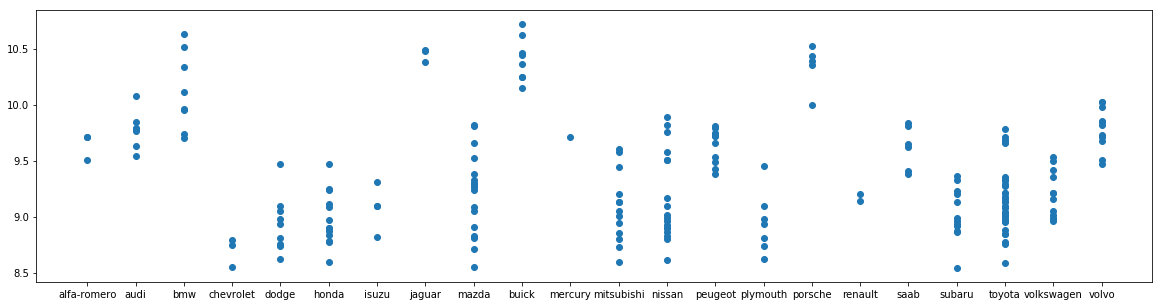

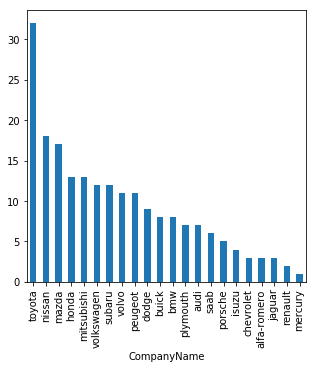

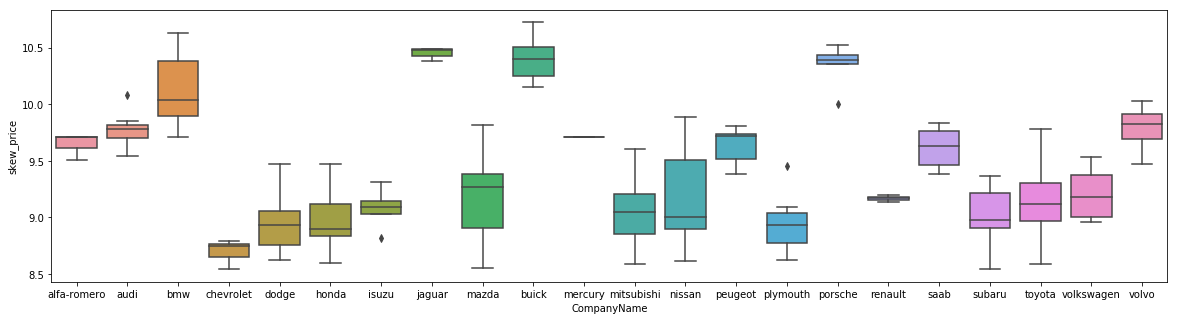

fueltype


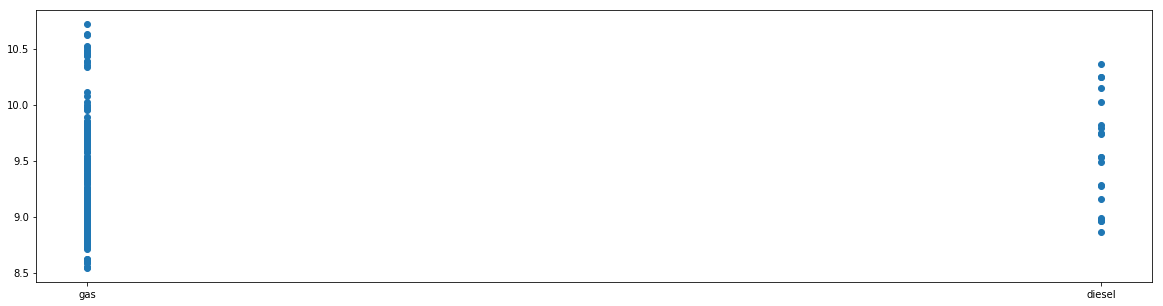

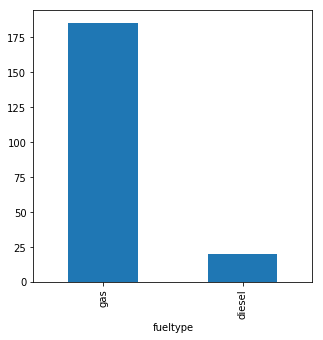

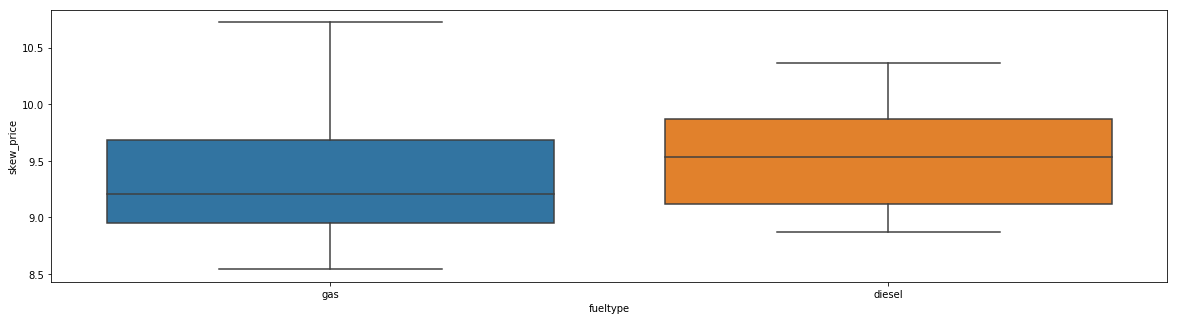

aspiration


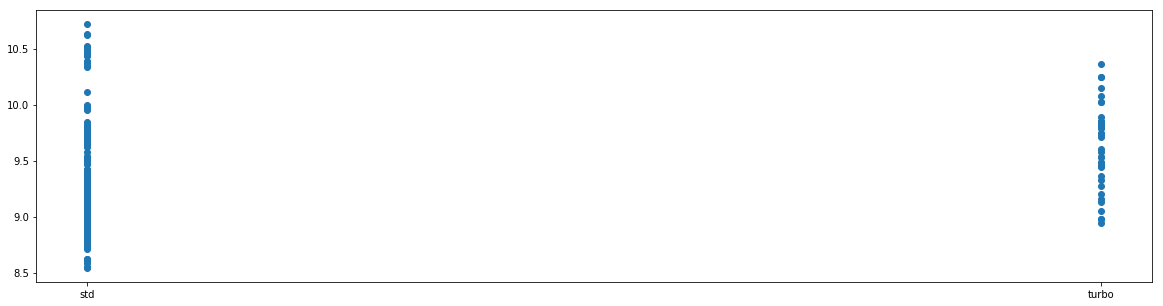

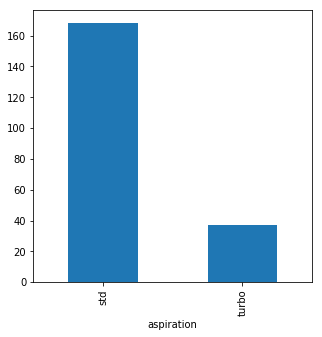

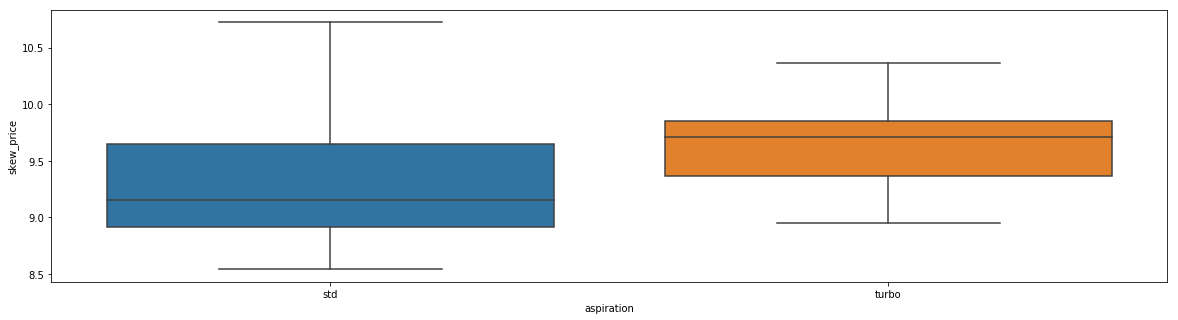

doornumber


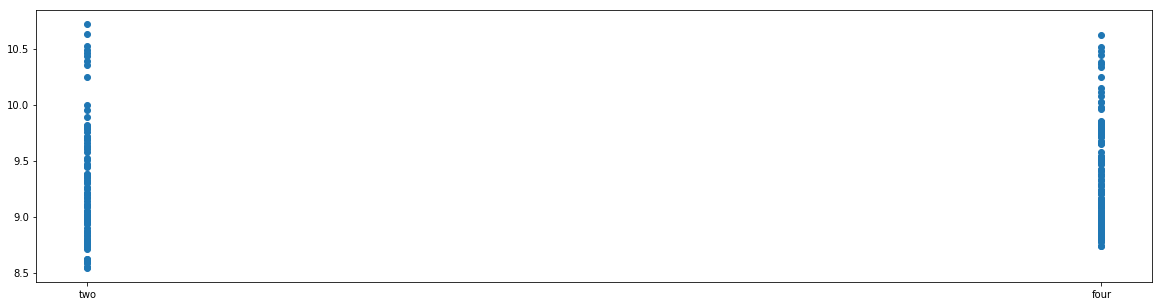

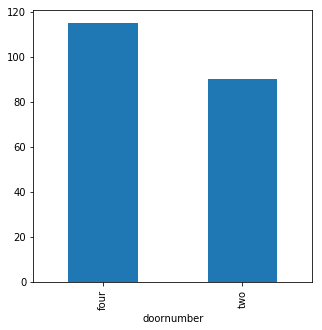

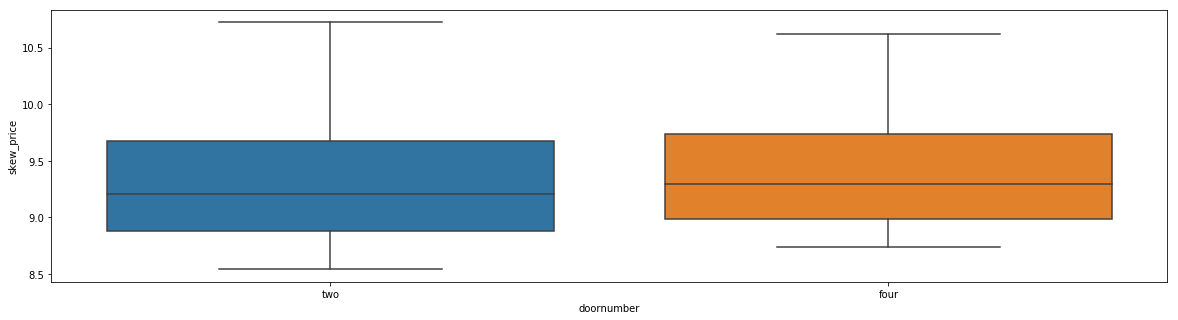

carbody


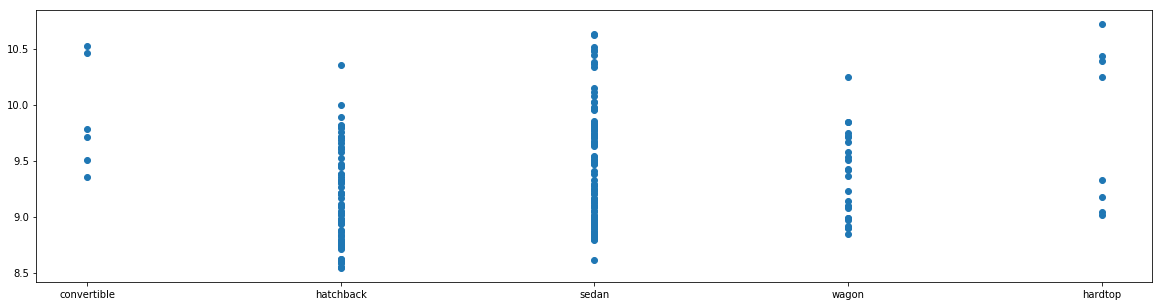

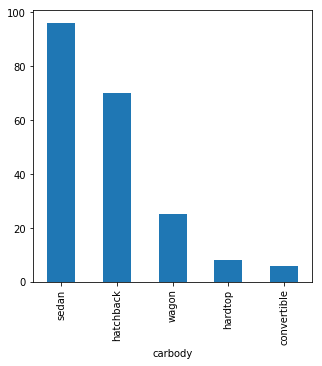

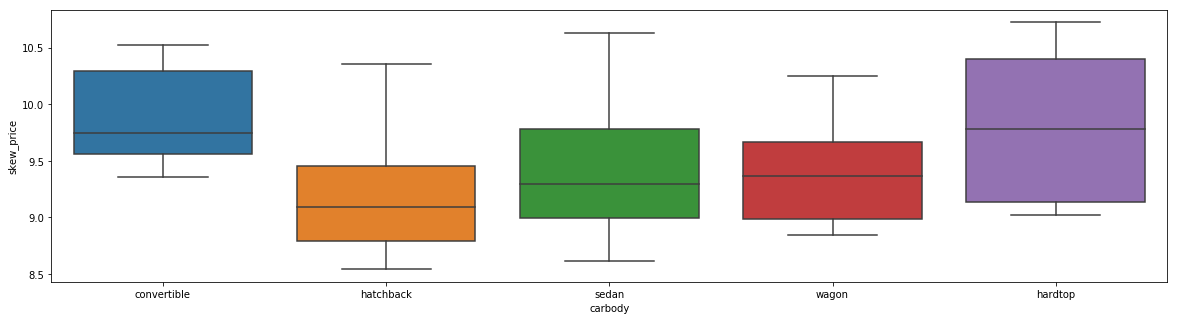

drivewheel


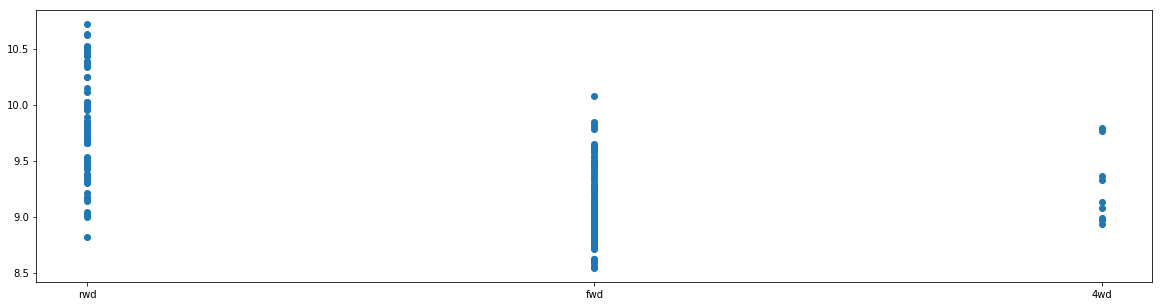

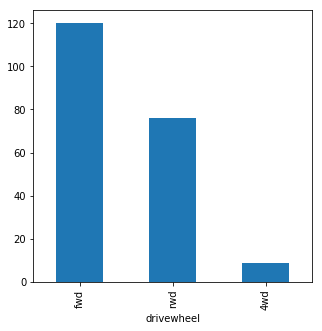

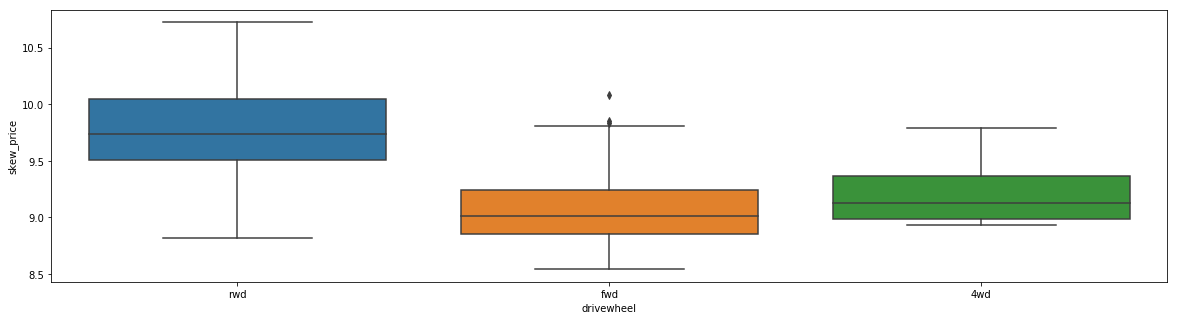

enginelocation


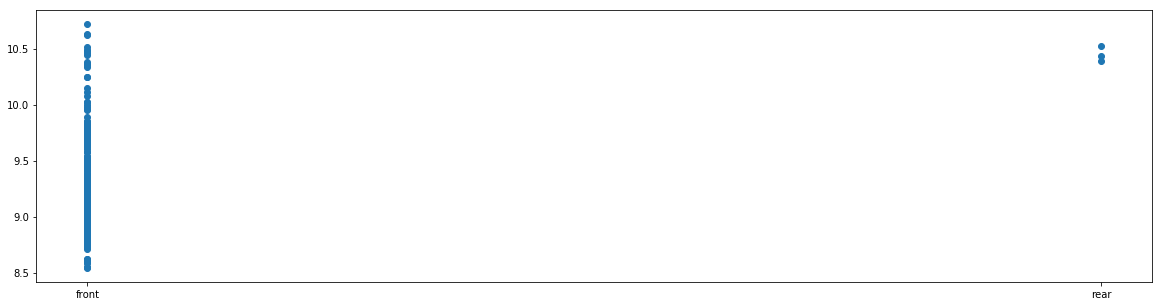

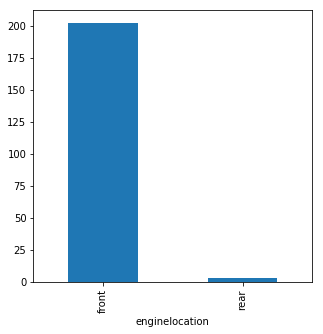

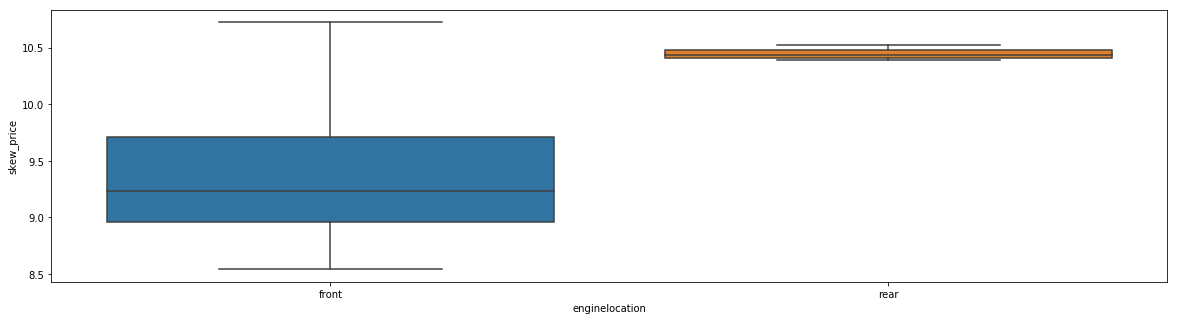

enginetype


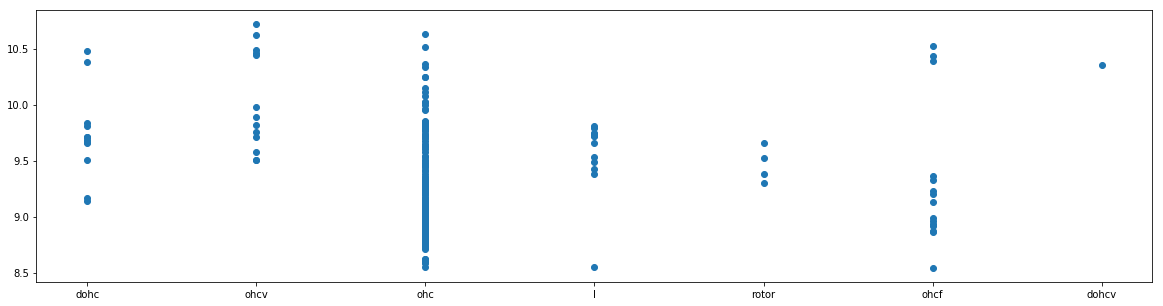

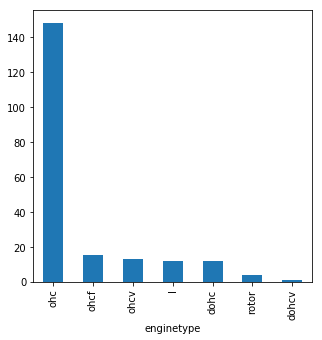

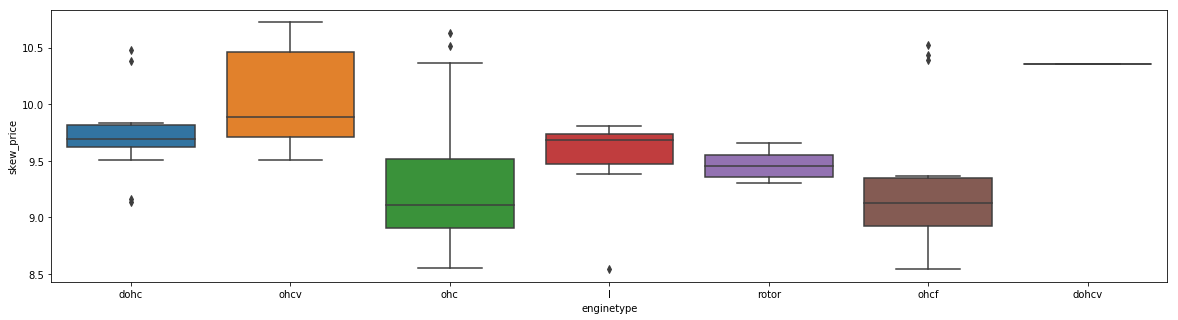

cylindernumber


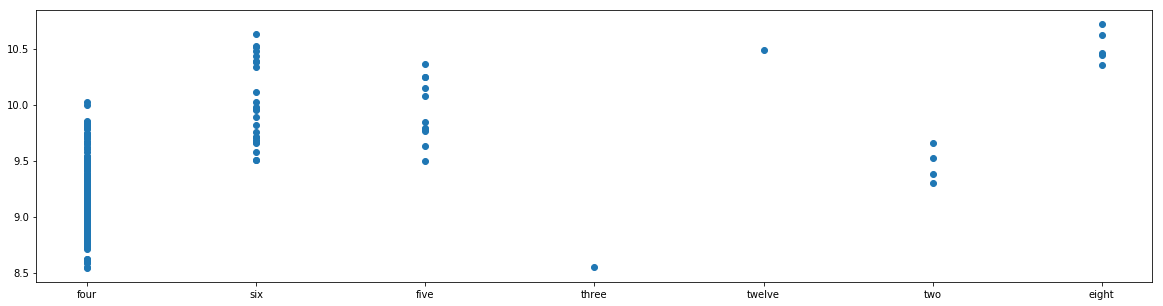

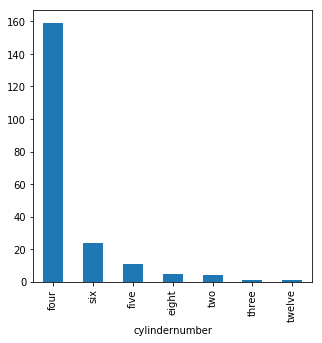

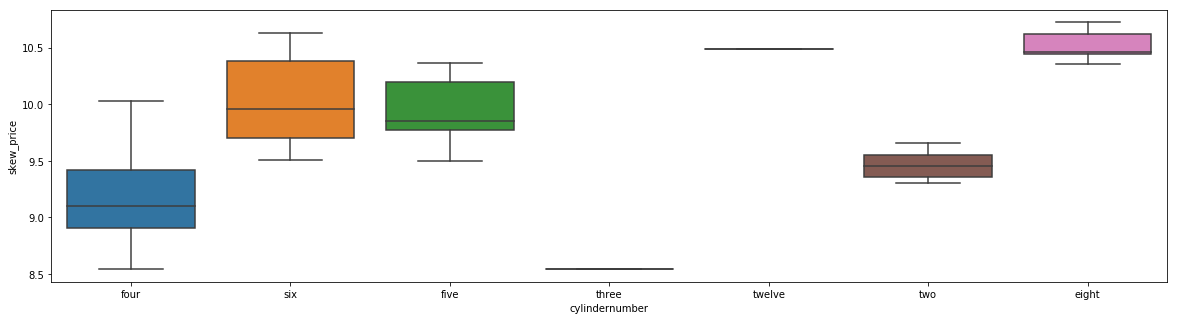

fuelsystem


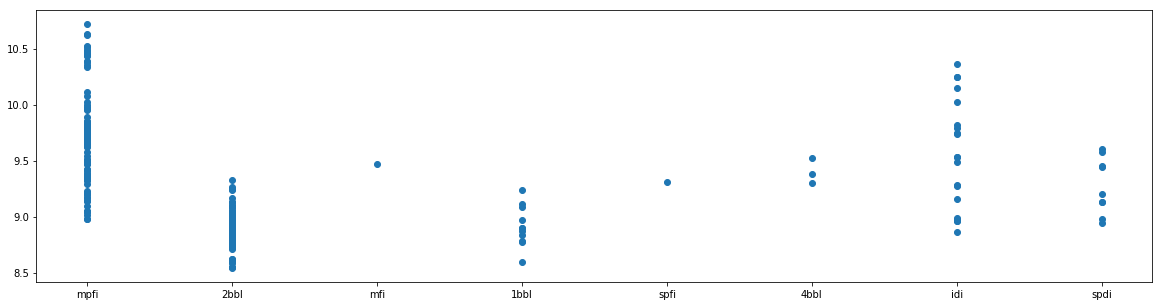

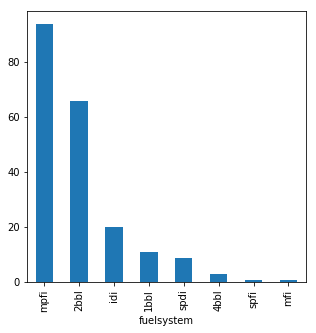

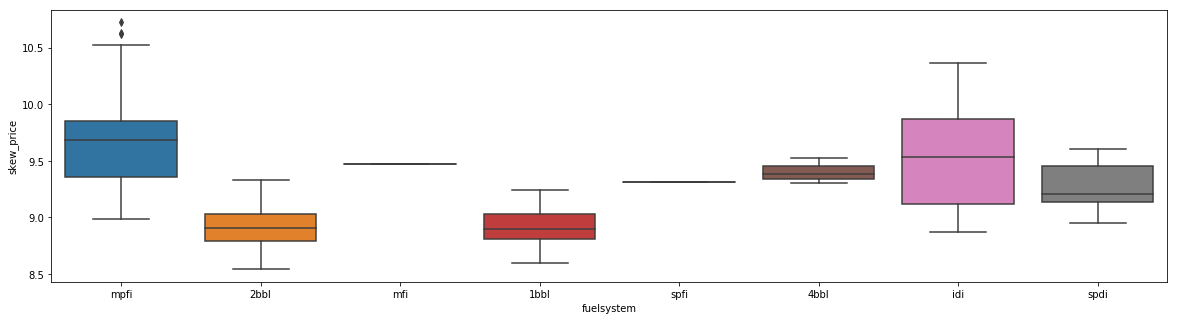

In [321]:
for i in categorical_columns:
    categorical_visualization(i)

From above plots it is clear that <b>fueltype, doornumber, carbody, enginelocation</b> and<b> enginetype</b> does not have strong correlation with price so it's much better to remove them.
Before that take a look at numerical and remove also and then remove the unimportant features altogether.

In [322]:
def numerical_visualizatiom(x):

    plt.figure(figsize=(5,5))
    plt.scatter(cars[x],cars["skew_price"])
    plt.ylabel("Price")
    plt.xlabel(x)
    
    plt.show()

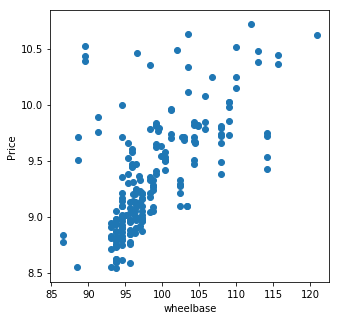

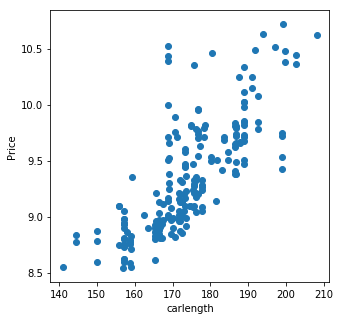

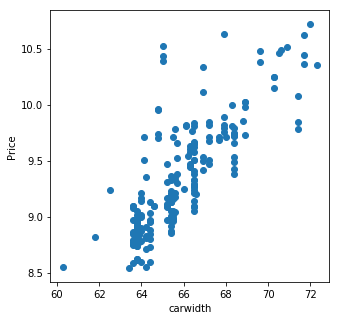

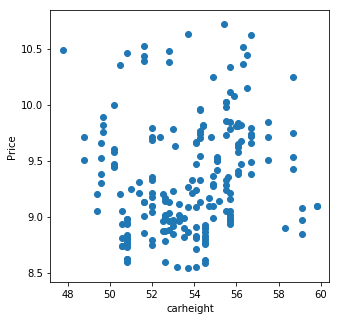

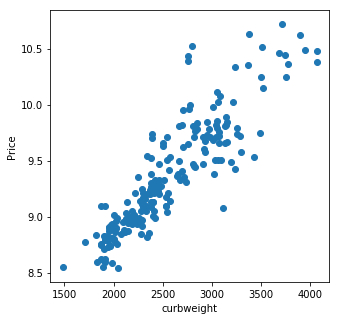

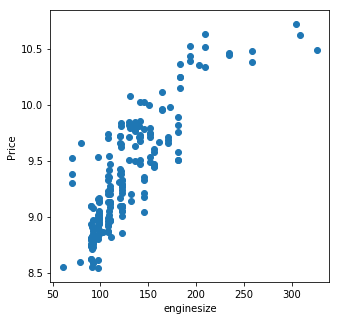

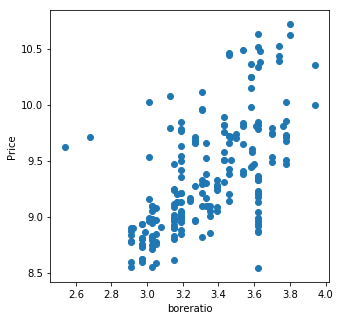

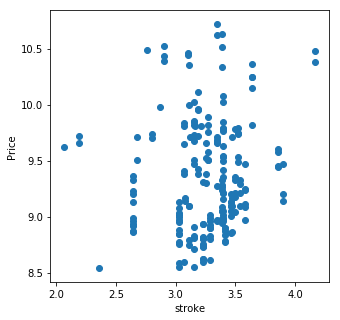

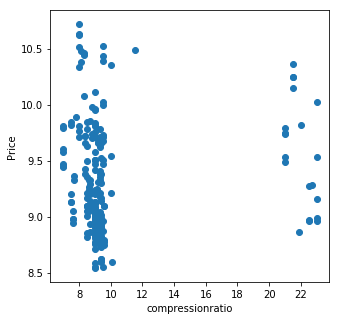

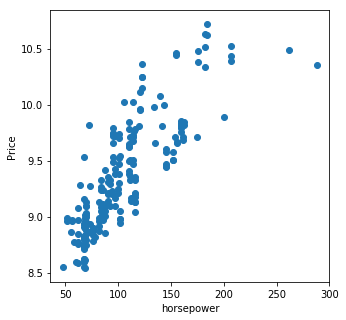

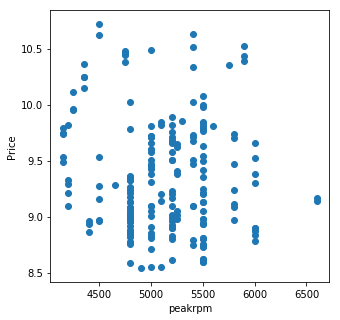

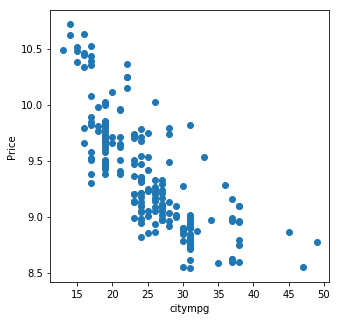

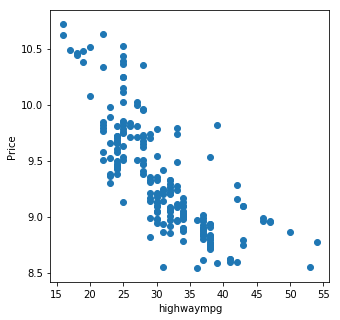

In [323]:
for i in numerical_columns:
    numerical_visualizatiom(i)

From the above plot it is clear that <b> wheelbase, carheight, boreratio, stroke, compressionratio</b> and <b>peakrpm</b> does not have any strong correlation with price, so it's better to remove them too.

In [324]:
cars.drop(["symboling","fueltype", "doornumber", "carbody", "enginelocation", "enginetype"],axis=1,inplace=True)
cars.drop(["car_ID","wheelbase", "carheight", "boreratio", "stroke","compressionratio","peakrpm"],axis=1,inplace=True)

Now look at the correlation between all features using <b>pairplot</b> and <b>heatmap</b>

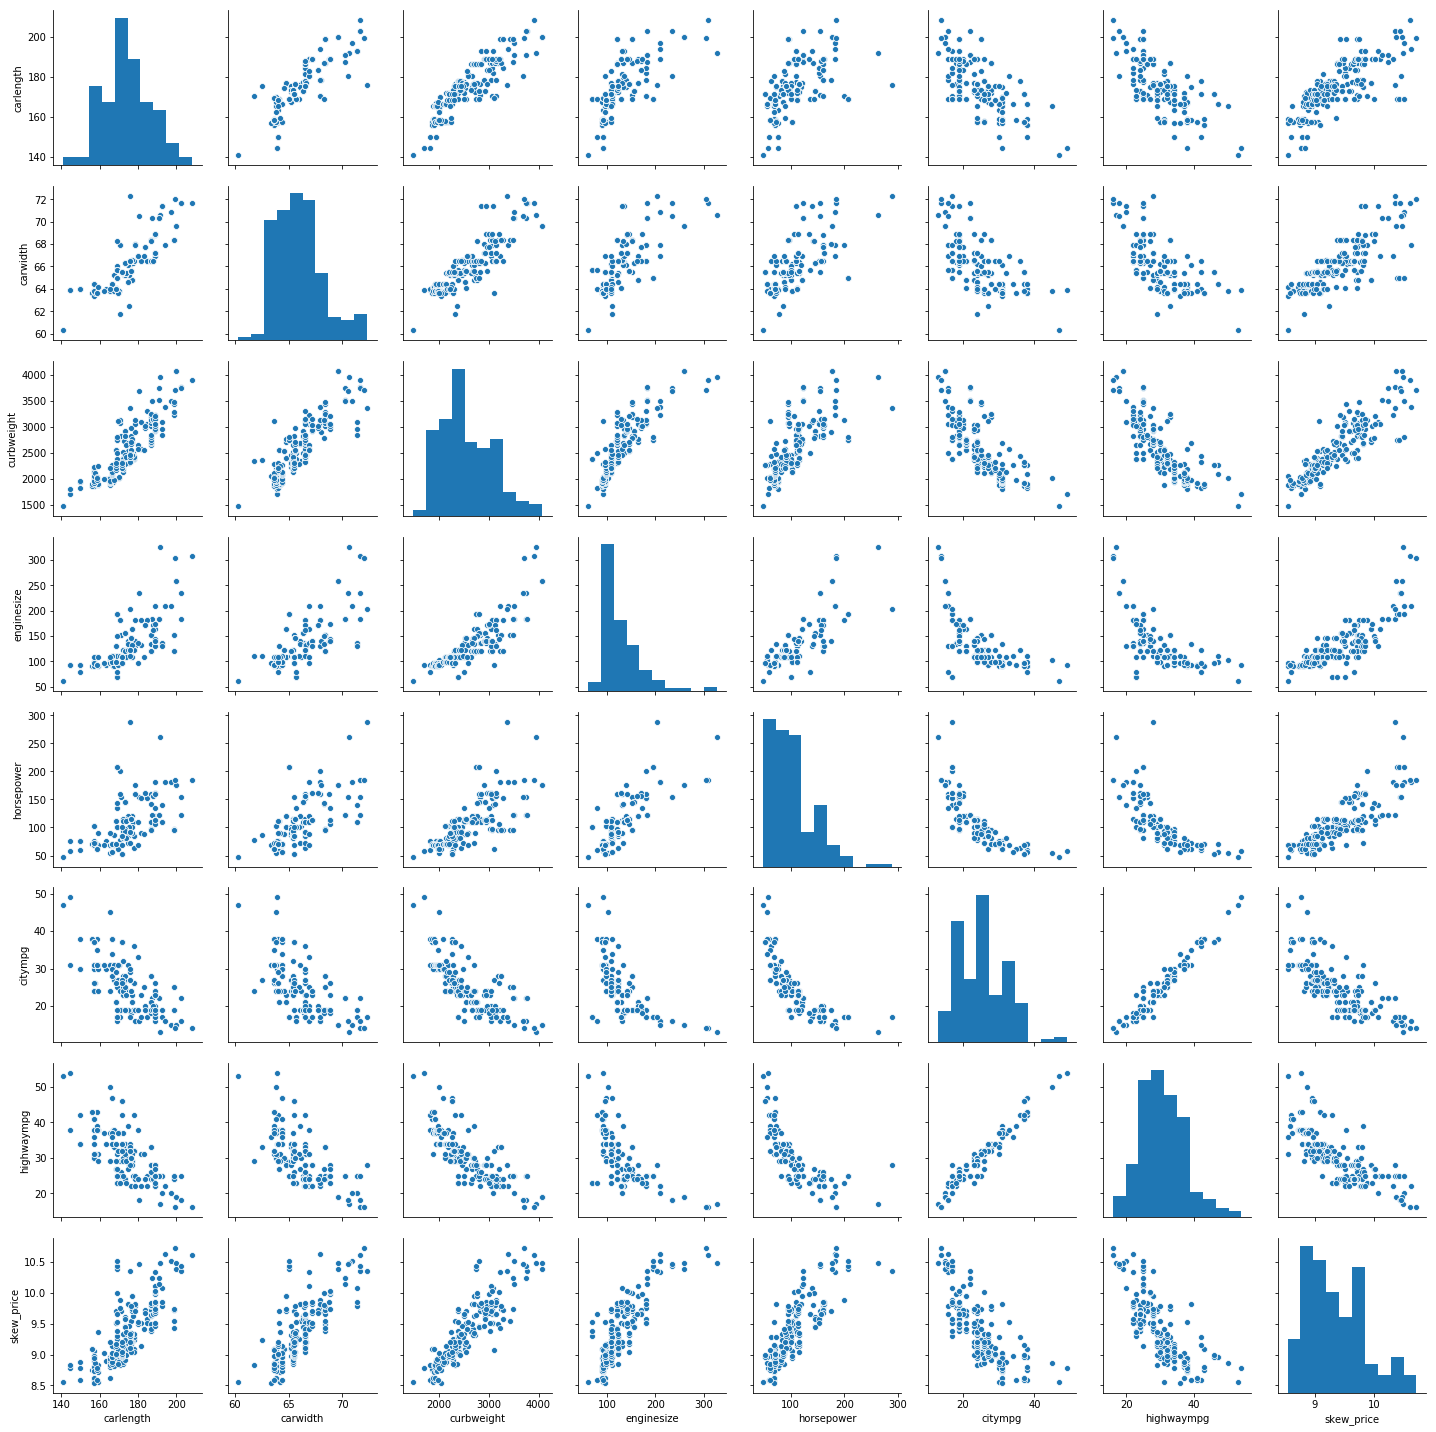

In [325]:
sns.pairplot(cars)
plt.show()

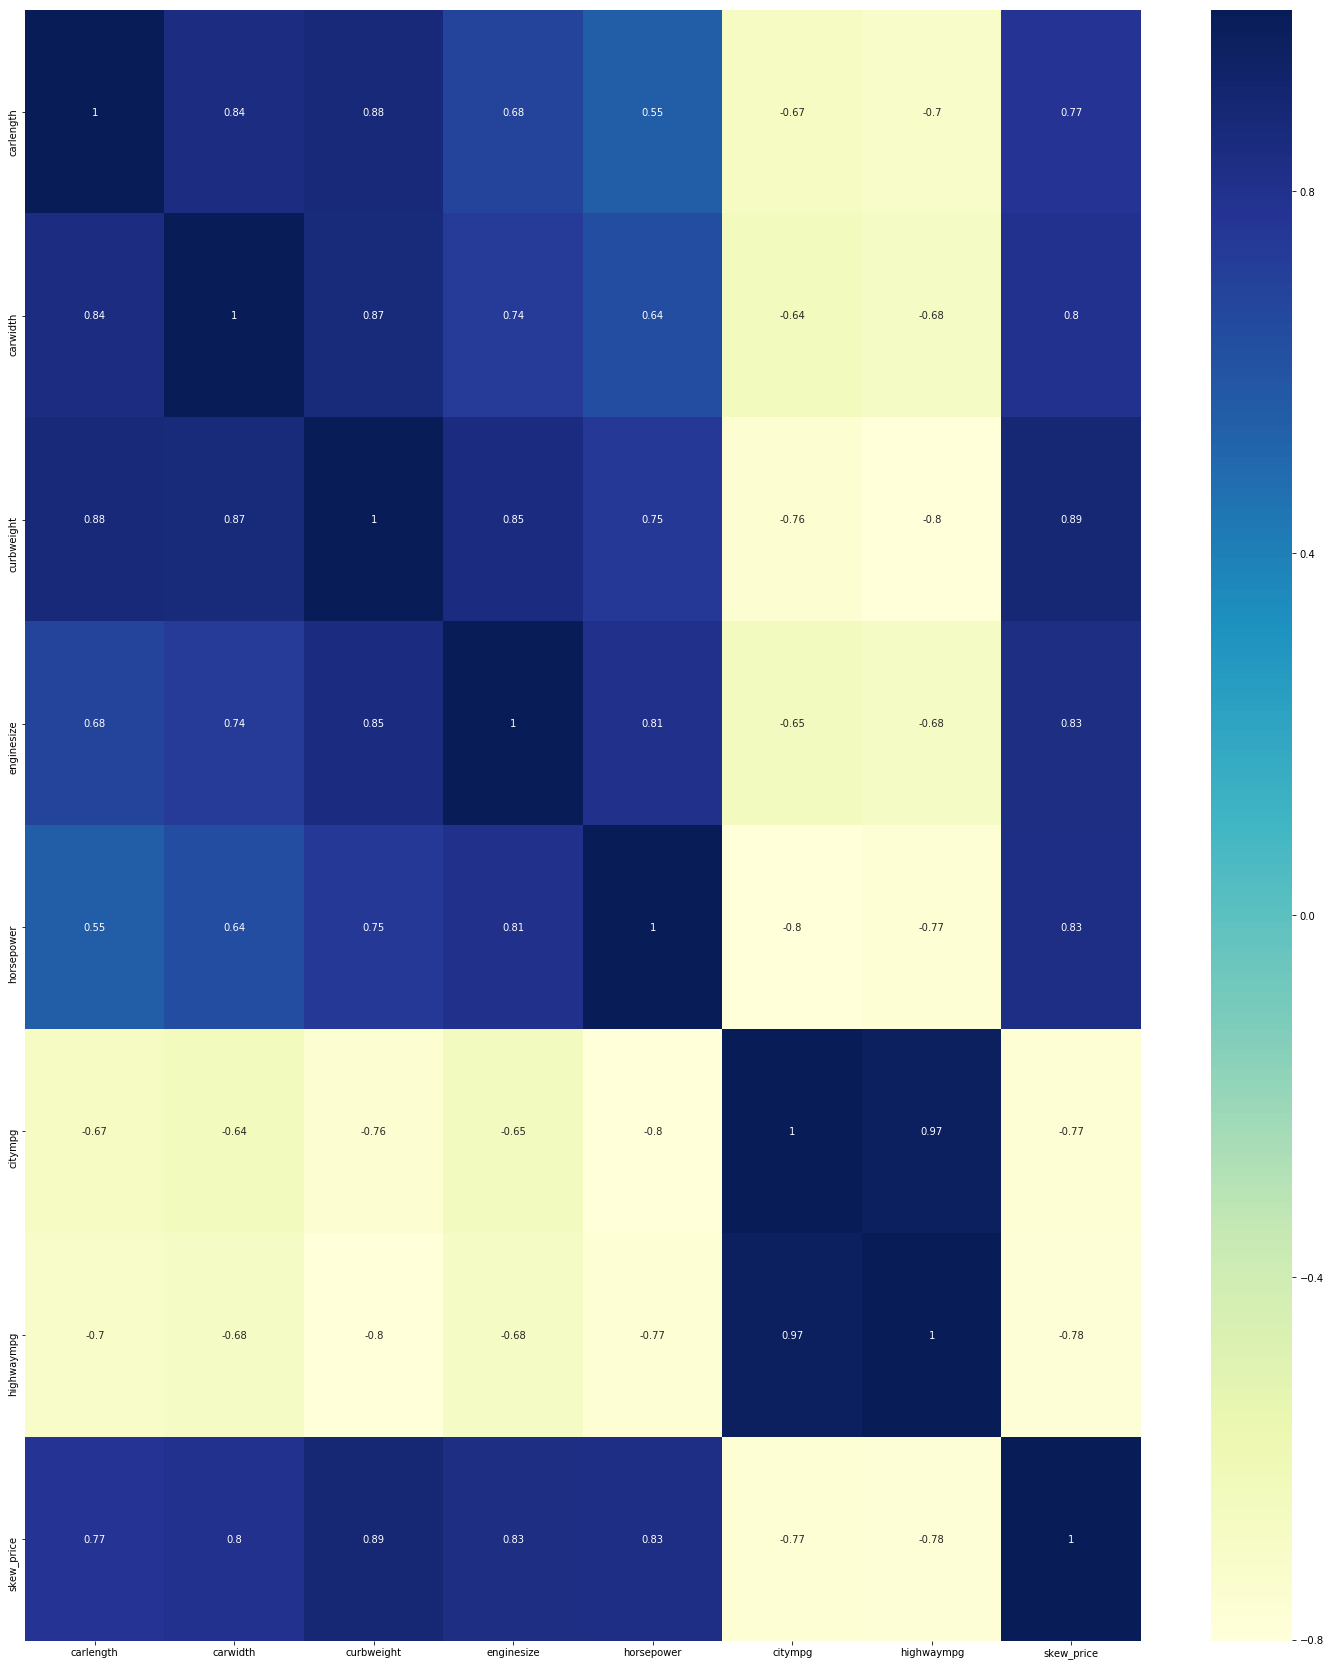

In [326]:
plt.figure(figsize = (25,30))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

<b>curbweight</b> and <b> size</b> are very much correlated so let's remove <b>size</b><br>
Also <b>highwaympg</b> and and <b>citympg</b> are very much correlated so let's remove <b>highwaympg</b><br>
There is one thing also which can be helpful and that is converting <b>carlength</b> and <b>carwidth</b> to <b>size</b>

In [327]:
cars.drop(["highwaympg"],axis=1,inplace=True)

In [328]:
cars["size"]=cars["carlength"]*cars["carwidth"]
cars.drop(["carlength","carwidth"],axis=1,inplace=True)

Let's take a record of our main features

In [329]:
main_features=cars[["CompanyName","cylindernumber","aspiration","fuelsystem","size","drivewheel",
                  "curbweight","enginesize","horsepower","citympg","skew_price"]]

In [330]:
for i in ["CompanyName","cylindernumber","aspiration","drivewheel","fuelsystem"]:
    dummy= pd.get_dummies(main_features[i], drop_first= True)
    main_features= pd.concat([main_features, dummy], axis= 1)
    main_features.drop([i],axis= 1, inplace= True)

In [331]:
Y=main_features["skew_price"]
main_features.drop(["skew_price"],axis=1,inplace=True)

In [332]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,Y_train_1,Y_test_1=train_test_split(main_features,Y,random_state=1)
X_train_2,X_test_2,Y_train_2,Y_test_2=train_test_split(main_features,Y,random_state=15)
X_train_3,X_test_3,Y_train_3,Y_test_3=train_test_split(main_features,Y,random_state=35)
X_train_4,X_test_4,Y_train_4,Y_test_4=train_test_split(main_features,Y,random_state=4)
X_train_5,X_test_5,Y_train_5,Y_test_5=train_test_split(main_features,Y,random_state=55)

In [333]:
from sklearn.preprocessing import MinMaxScaler
scaler_1=MinMaxScaler()
X_train_1=scaler_1.fit_transform(X_train_1)
X_test_1=scaler_1.transform(X_test_1)

scaler_2=MinMaxScaler()
X_train_2=scaler_2.fit_transform(X_train_2)
X_test_2=scaler_2.transform(X_test_2)

scaler_3=MinMaxScaler()
X_train_3=scaler_3.fit_transform(X_train_3)
X_test_3=scaler_3.transform(X_test_3)

scaler_4=MinMaxScaler()
X_train_4=scaler_4.fit_transform(X_train_4)
X_test_4=scaler_4.transform(X_test_4)

scaler_5=MinMaxScaler()
X_train_5=scaler_5.fit_transform(X_train_5)
X_test_5=scaler_5.transform(X_test_5)

C:\Users\ss\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\ss\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\ss\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\ss\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\ss\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dt

In [334]:
from sklearn.linear_model import LinearRegression
reg_1=LinearRegression()
reg_1.fit(X_train_1,Y_train_1)
Y_predict_1=reg_1.predict(X_test_1)

reg_2=LinearRegression()
reg_2.fit(X_train_2,Y_train_2)
Y_predict_2=reg_2.predict(X_test_2)

reg_3=LinearRegression()
reg_3.fit(X_train_3,Y_train_3)
Y_predict_3=reg_3.predict(X_test_3)

reg_4=LinearRegression()
reg_4.fit(X_train_4,Y_train_4)
Y_predict_4=reg_4.predict(X_test_4)

reg_5=LinearRegression()
reg_5.fit(X_train_5,Y_train_5)
Y_predict_5=reg_5.predict(X_test_5)

In [335]:
score_1=reg_1.score(X_test_1,Y_test_1)
score_2=reg_2.score(X_test_2,Y_test_2)
score_3=reg_3.score(X_test_3,Y_test_3)
score_4=reg_4.score(X_test_4,Y_test_4)
score_5=reg_5.score(X_test_5,Y_test_5)

print("One= ",reg_1.score(X_test_1,Y_test_1))
print("Two= ",reg_2.score(X_test_2,Y_test_2))
print("Three= ",reg_3.score(X_test_3,Y_test_3))
print("Four= ",reg_4.score(X_test_4,Y_test_4))
print("Five= ",reg_5.score(X_test_5,Y_test_5))

One=  0.9287246954482967
Two=  0.9368454265527345
Three=  0.9155661221606247
Four=  0.921622860448764
Five=  0.9064930734269173


In [336]:
print("Ovearall accuracy of model= ",(score_1+score_2+score_3+score_4+score_5)/5)

Ovearall accuracy of model=  0.9218504356074675
